#Decision Tree Classifier
In this Python Notebook, using Decision Tree Classifier from sklearn, we are trying to predict whether a crime has occured based on certain features or not and then calculating the accuracy of the decision tree classifier after training and testing the model.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
balance_data = pd.read_csv('crimedata.csv',sep= ',', encoding= "ISO-8859-1")
balance_data = balance_data.replace('?', '0')

FileNotFoundError: ignored

In [0]:
balance_data.shape

(2215, 147)

In [0]:
balance_data.head

<bound method NDFrame.head of                Êcommunityname state countyCode communityCode  fold  \
0     BerkeleyHeightstownship    NJ         39          5320     1   
1              Marpletownship    PA         45         47616     1   
2                  Tigardcity    OR          0             0     1   
3            Gloversvillecity    NY         35         29443     1   
4                 Bemidjicity    MN          7          5068     1   
5             Springfieldcity    MO          0             0     1   
6                 Norwoodtown    MA         21         50250     1   
7                Andersoncity    IN          0             0     1   
8                   Fargocity    ND         17         25700     1   
9                    Wacocity    TX          0             0     1   
10                Shermancity    TX          0             0     1   
11               SanPablocity    CA          0             0     1   
12           BowlingGreencity    KY          0             0

In [0]:
violent_crimes = list(map(float, balance_data.ViolentCrimesPerPop))

In [0]:
violent_crimes_mean = sum(violent_crimes)/len(violent_crimes)

In [0]:
violent_crimes_mean

530.3040045146731

In [0]:
balance_data['mean_violent_crimes'] = violent_crimes_mean

In [0]:
balance_data['violent_crime_occurence'] = np.where(violent_crimes>=balance_data['mean_violent_crimes'], '1', '0')

In [0]:
balance_data.groupby('violent_crime_occurence').mean()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,mean_violent_crimes
violent_crime_occurence,,,,,,,,,,,,,,,,,,,,,
0,5.509979,32689.042670,2.707529,4.716284,90.651535,2.434721,4.499188,14.372340,27.183125,13.781672,...,52.989732,77.301493,88.433861,20.915279,2383.545630,2.755100,0.433827,2.309704,2.775354,530.304005
1,5.464567,92072.383202,2.706942,18.142375,71.258031,3.119226,14.530604,14.585984,28.525249,14.344055,...,48.771535,77.620039,87.497874,39.823228,3547.116535,3.586522,2.021929,18.166667,11.739829,530.304005


In [0]:
#X = balance_data.values[:, [5,6,17,37,47,50,56,96,129,131,133,135,137,139,141,143,145]]
balance_data = balance_data[['population','householdsize','medIncome','PctUnemployed','PolicReqPerOffic','murders','rapes','burglaries','robberies','violent_crime_occurence']]
balance_data = balance_data
X_DecisionTree = balance_data.drop('violent_crime_occurence', axis=1)
Y_DecisionTree = balance_data['violent_crime_occurence']
print(X_DecisionTree)
print(y_DecisionTree)

      population  householdsize  medIncome  PctUnemployed PolicReqPerOffic  \
0          11980           3.10      75122           2.70                0   
1          23123           2.82      47917           2.43                0   
2          29344           2.43      35669           4.01                0   
3          16656           2.40      20580           9.86                0   
4          11245           2.76      17390           9.08                0   
5         140494           2.45      21577           5.72                0   
6          28700           2.60      42805           4.85                0   
7          59459           2.45      23221           8.19                0   
8          74111           2.46      25326           4.18                0   
9         103590           2.62      17852           8.39            370.9   
10         31601           2.54      24763           7.19                0   
11         25158           2.89      25479          10.16       

In [0]:
from sklearn.model_selection import train_test_split
X_train_DecisionTree, X_test_DecisionTree, Y_train_DecisionTree, Y_test_DecisionTree = train_test_split(X_DecisionTree, Y_DecisionTree, random_state=1)

In [0]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=20, min_samples_split=9, min_samples_leaf=6)
clf_gini

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [0]:
clf_gini.fit(X_train_DecisionTree, Y_train_DecisionTree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [0]:
Y_Pred_DecisionTree = clf_gini.predict(X_test_DecisionTree)
Y_Pred_DecisionTree

array(['0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1',
       '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0',
       '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0',
       '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1',
       '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0

In [0]:
ac=accuracy_score(Y_test_DecisionTree, Y_Pred_DecisionTree)*100
ac

85.5595667870036

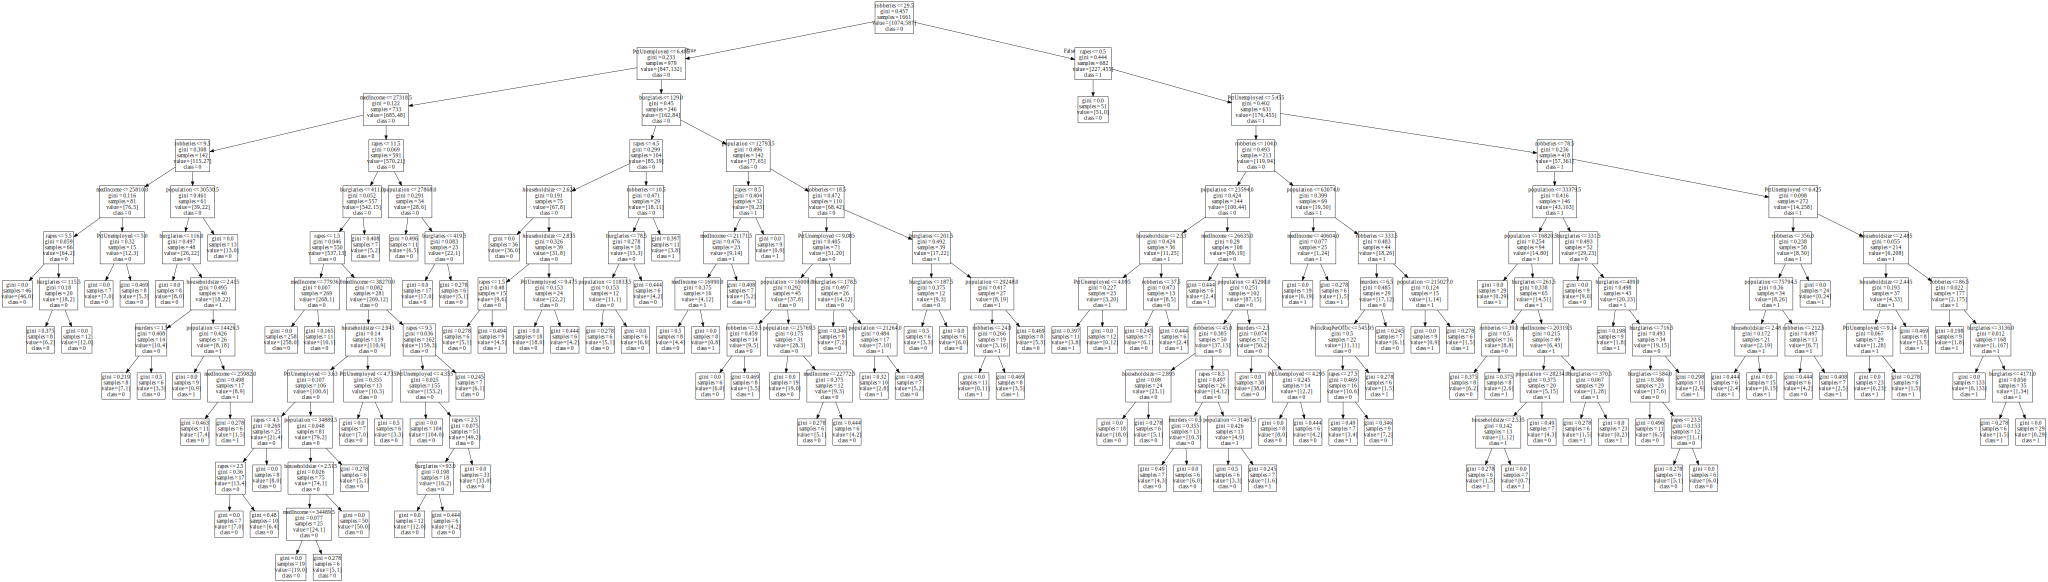

In [0]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=X_DecisionTree.columns, class_names=['0','1'])
graph = graphviz.Source(dot_data) 
graph.render("crime") 
graph

Model Accuracy for Random Forest: 0.855595667870036


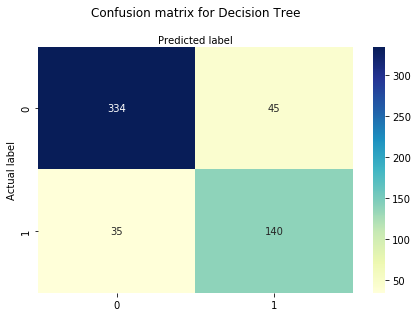

In [0]:
# For Decision Tree
cnf_matrix_DecisionTree = metrics.confusion_matrix(Y_test_DecisionTree, Y_Pred_DecisionTree)
cnf_matrix_DecisionTree
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DecisionTree), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_DecisionTree, Y_Pred_DecisionTree))